# Built-in Macrostate Visualizations

This notebook demonstrates how to use the `visualize_macrostates` function
to visualize the macrostates that CFL constructs over cause and effect spaces.

In [1]:
import numpy as np
from cfl.experiment import Experiment
from cfl.visualization.basic_visualizations import visualize_macrostates

### CFL helper function

First, we will create a helper function to quickly define and train
CFL experiments. If you are unfamiliar with how to define a CFL experiment,
please refer to the cfl_code_intro notebook.

In [2]:
def create_and_train_CFL_experiment(X, Y):
    ''' Helper function that will create a CFL experiment and train it for
        this demo.
    '''

    # set up pipeline parameters
    data_info = {'X_dims' : X.shape, 'Y_dims' : Y.shape, 'Y_type' : 'continuous'}
    CDE_params = {'model' : 'CondExpMod', 'model_params' : 
        {'n_epochs' : 5, 'verbose' : 0, 'show_plot' : False}}
    cause_cluster_params =  {'model' : 'KMeans', 'model_params' : {'n_clusters' : 4}, 
        'verbose' : 0, 'tune' : False}
    effect_cluster_params = {'model' : 'KMeans', 'model_params' : {'n_clusters' : 2}, 
        'verbose' : 0, 'tune' : False}

    block_names = ['CondDensityEstimator', 'CauseClusterer', 'EffectClusterer']
    block_params = [CDE_params, cause_cluster_params, effect_cluster_params]
    save_path = 'basic_vis_results'

    # Create a new CFL experiment with specified parameters
    my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, 
                        block_names=block_names, block_params=block_params, 
                        results_path=save_path, verbose=0)
    my_exp.train()
    return my_exp

## Visualizing macrostates over 1D data
Here, we construct a dataset where the variables in both X and Y are 
1-dimensional. Here, when we say 1-dimensional, we mean that the data is not
spatially organized in 2D (like an image), or any other higher dimensional
organization. Note that the data can still contain many variables, and in that
sense it is high-dimensional, but in the context of visualization it is 1D.

In [3]:
# define the parameters of our toy dataset
n_samples = 1000
n_cause_features = 10
n_effect_features = 2

# randomly sampled X and Y values
X = np.random.normal(loc=1, size=(n_samples,n_cause_features))
Y = np.random.normal(loc=2, size=(n_samples,n_effect_features))
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

# name each feature in X and Y (you may have more specific variable names that
# you'd want to supply here)
X_feature_names = [f'cause_{i}' for i in range(n_cause_features)]
Y_feature_names = [f'effect_{i}' for i in range(n_effect_features)]

# create and train experiment
my_exp = create_and_train_CFL_experiment(X, Y)

# print out where the experiment was saved
print('Experiment saved to: ')
print(my_exp.get_save_path())

X shape:  (1000, 10)
Y shape:  (1000, 2)
Block: verbose not specified in input, defaulting to 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph

100%|██████████| 1000/1000 [00:00<00:00, 6930.31it/s]


Experiment saved to: 
basic_vis_results/experiment0000


The simplest way to visualize macrostates is by taking all of the samples
in our dataset that fall into a certain macrostate and looking at the mean
across those samples. We can then compare these means across macrostates to 
see how variables differ. 

Here's how you would visualize the means of the macrostates CFL found on the cause side:

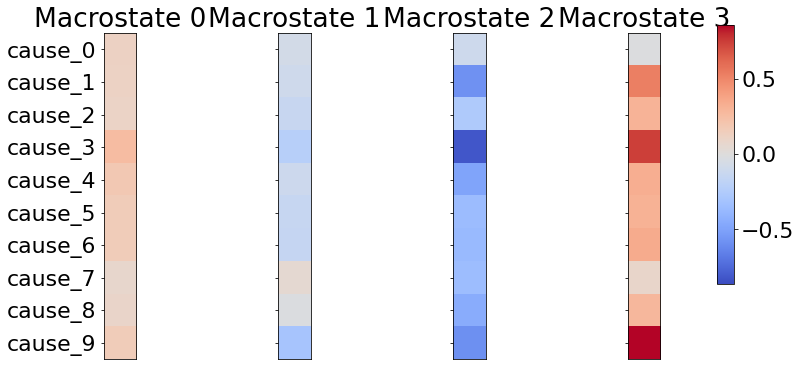

In [4]:
# visualize cause side macrostates
visualize_macrostates(  data=X, # data to visualize
                        feature_names=X_feature_names, 
                        cause_or_effect='cause', 
                        exp_path='basic_vis_results/experiment0000', # where was the data saved?
                        data_series='dataset_train', # if you've passed multiple datasets through CFL's predict method, you can select which one you want
                        subtract_global_mean=True) # do you want to plot the raw data or relative to the global mean?

The process is quite similar for visualizing results on the effect side, 
except that now you change the data, feature_names, and cause_or_effect values:

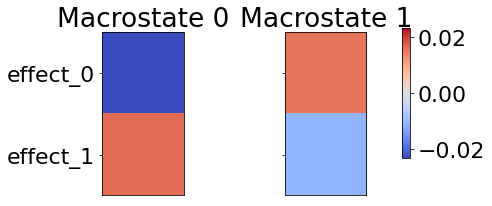

In [5]:
# visualize effect side macrostates
visualize_macrostates(  data=Y,
                        feature_names=Y_feature_names,
                        cause_or_effect='effect', # change the space you want to plot in along with the data
                        exp_path='basic_vis_results/experiment0000',
                        data_series='dataset_train',
                        subtract_global_mean=True)

Up to now, we told `visualize_macrostates` to subtract the global mean
from each of macrostate means. You can also plot the raw means by setting
`subtract_global_mean` to False:

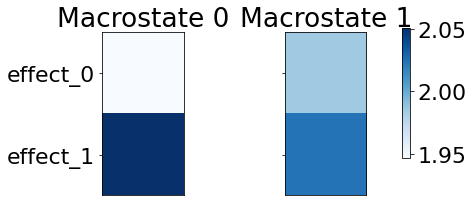

In [6]:
# visualize effect side macrostates
visualize_macrostates(  data=Y,
                        feature_names=Y_feature_names,
                        cause_or_effect='effect', # change the space you want to plot in along with the data
                        exp_path='basic_vis_results/experiment0000',
                        data_series='dataset_train',
                        subtract_global_mean=False)

## 2D visualization

In [7]:
# define the parameters of our toy dataset
n_samples = 1000
n_cause_features = [10,5] # our cause samples are now 10x5 images
n_effect_features = 2

# randomly sampled X and Y values
# note that we construct X_flattened here to pass in vectorized samples to CFL
X = np.random.normal(loc=1, size=np.concatenate([[n_samples], n_cause_features]))
X_flattened = np.reshape(X, (n_samples, np.product(n_cause_features)))
Y = np.random.normal(loc=2, size=(n_samples,n_effect_features))
print('X shape: ', X.shape)
print('X flattened (for CFL) shape: ', X_flattened.shape)
print('Y shape: ', Y.shape)

# name each feature in X and Y (you may have more specific variable names that
# you'd want to supply here)
X_feature_names = [[f'cause{j}_{i}' for i in range(n_cause_features[j])] for j in range(len(n_cause_features))]
Y_feature_names = [f'effect_{i}' for i in range(n_effect_features)]

# create and train experiment
my_exp = create_and_train_CFL_experiment(X_flattened, Y)

# print out where the experiment was saved
print('Experiment saved to: ')
print(my_exp.get_save_path())

X shape:  (1000, 10, 5)
X flattened (for CFL) shape:  (1000, 50)
Y shape:  (1000, 2)
Block: verbose not specified in input, defaulting to 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warni

100%|██████████| 1000/1000 [00:00<00:00, 6702.05it/s]


Experiment saved to: 
basic_vis_results/experiment0001


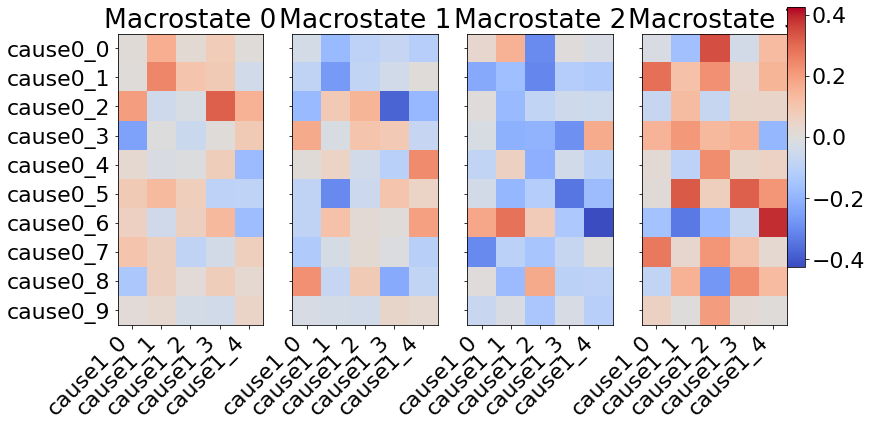

In [8]:
# visualize cause side macrostates
visualize_macrostates(  data=X,
                        feature_names=X_feature_names,
                        cause_or_effect='cause',
                        exp_path='basic_vis_results/experiment0001',
                        data_series='dataset_train',
                        subtract_global_mean=True)

## 3D visualization

In [9]:
# define the parameters of our toy dataset
n_samples = 1000
n_cause_features = [10,5,3] # our cause samples are now 10x5x3 volumes
n_effect_features = 2

# randomly sampled X and Y values
# note that we construct X_flattened here to pass in vectorized samples to CFL
X = np.random.normal(loc=1, size=np.concatenate([[n_samples], n_cause_features]))
X_flattened = np.reshape(X, (n_samples, np.product(n_cause_features)))
Y = np.random.normal(loc=2, size=(n_samples,n_effect_features))
print('X shape: ', X.shape)
print('X flattened (for CFL) shape: ', X_flattened.shape)
print('Y shape: ', Y.shape)

# name each feature in X and Y (you may have more specific variable names that
# you'd want to supply here)
X_feature_names = [[f'cause{j}_{i}' for i in range(n_cause_features[j])] for j in range(len(n_cause_features))]
Y_feature_names = [f'effect_{i}' for i in range(n_effect_features)]

# create and train experiment
my_exp = create_and_train_CFL_experiment(X_flattened, Y)

# print out where the experiment was saved
print('Experiment saved to: ')
print(my_exp.get_save_path())

X shape:  (1000, 10, 5, 3)
X flattened (for CFL) shape:  (1000, 150)
Y shape:  (1000, 2)
Block: verbose not specified in input, defaulting to 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this w

100%|██████████| 1000/1000 [00:00<00:00, 1872.22it/s]


Experiment saved to: 
basic_vis_results/experiment0002


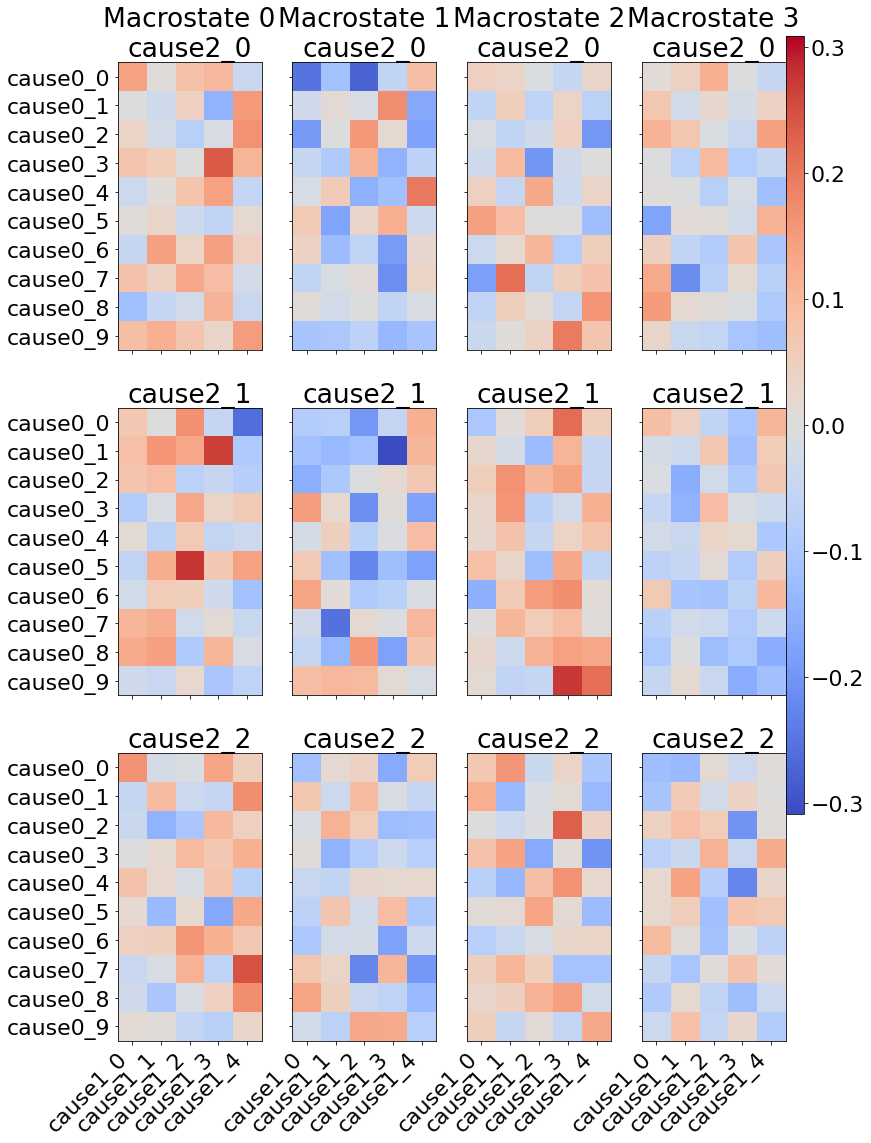

In [10]:
# visualize cause side macrostates
visualize_macrostates(  data=X,
                        feature_names=X_feature_names,
                        cause_or_effect='cause',
                        exp_path='basic_vis_results/experiment0002',
                        data_series='dataset_train',
                        subtract_global_mean=True)